In [1]:
import numpy as np
import joblib
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

2024-09-17 19:23:38.031600: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load preprocessed data and the scaler
X_train = np.load("../data/processed/X_train.npy")
y_train = np.load("../data/processed/y_train.npy")
X_val = np.load("../data/processed/X_val.npy")
y_val = np.load("../data/processed/y_val.npy")
X_test = np.load("../data/processed/X_test.npy")
y_test = np.load("../data/processed/y_test.npy")

scaler = joblib.load("../data/processed/scaler.pkl")

In [3]:
# Define RNN model architecture
model = Sequential([
    SimpleRNN(512, return_sequences=False, input_shape=(X_train.shape[1], 1)),  # RNN layer with 512 units
    Dense(1)  # Output layer for predicting stock price
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=32)

Epoch 1/25
27/27 [==============================] - 2s 35ms/step - loss: 0.1385 - val_loss: 0.0258
Epoch 2/25
27/27 [==============================] - 1s 28ms/step - loss: 0.0038 - val_loss: 0.0178
Epoch 3/25
27/27 [==============================] - 1s 28ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 4/25
27/27 [==============================] - 1s 31ms/step - loss: 7.7583e-04 - val_loss: 0.0051
Epoch 5/25
27/27 [==============================] - 1s 31ms/step - loss: 6.3610e-04 - val_loss: 0.0023
Epoch 6/25
27/27 [==============================] - 1s 28ms/step - loss: 6.3103e-04 - val_loss: 0.0012
Epoch 7/25
27/27 [==============================] - 1s 28ms/step - loss: 6.0487e-04 - val_loss: 0.0013
Epoch 8/25
27/27 [==============================] - 1s 28ms/step - loss: 4.7519e-04 - val_loss: 0.0011
Epoch 9/25
27/27 [==============================] - 1s 28ms/step - loss: 4.2388e-04 - val_loss: 0.0011
Epoch 10/25
27/27 [==============================] - 1s 29ms/step - loss: 3.9594e-04 

In [4]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
val_loss = model.evaluate(X_val, y_val)
test_loss = model.evaluate(X_test, y_test)

print(f"Training Loss: {train_loss}")
print(f"Validation Loss: {val_loss}")
print(f"Test Loss: {test_loss}")

6/6 [==============================] - 0s 8ms/step - loss: 8.3765e-04
Training Loss: 0.00024086295161396265
Validation Loss: 0.0007965550757944584
Test Loss: 0.0008376538753509521


- **Loss Values:**
    - The loss is measured using mean squared error (MSE), which indicates how far off the model's predictions are from the actual values.
    - The training, validationa and the test loss are very low indicating that there has been a better fit of the model to the data.

In [5]:
# Make predictions
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 8ms/step


In [6]:
# Reverse the scaling for predictions and actual values
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

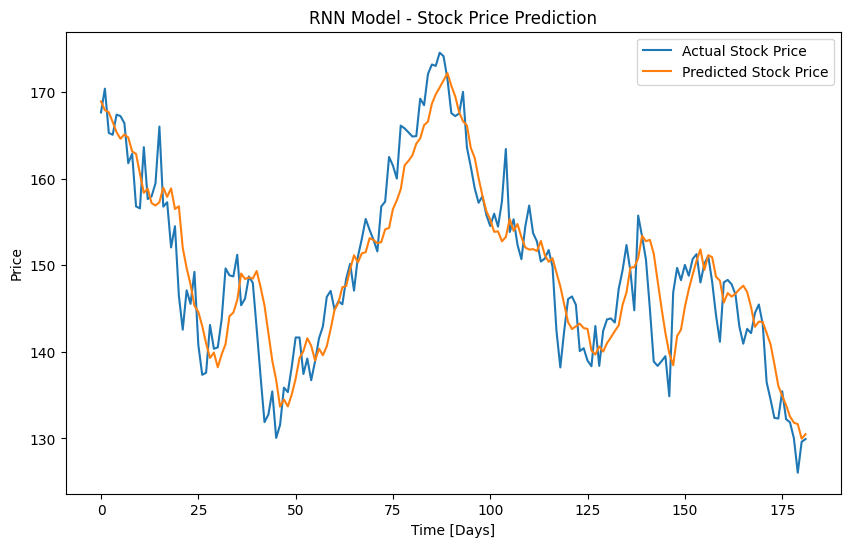

In [7]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, label="Actual Stock Price")
plt.plot(y_pred_rescaled, label="Predicted Stock Price")
plt.title("RNN Model - Stock Price Prediction")
plt.xlabel("Time [Days]")
plt.ylabel("Price")
plt.legend()
plt.savefig("../plots/rnn_model_prediction.png")
plt.show()

In [8]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 3.339873806460873
R-squared (R²): 0.8472170087663682


- **Mean Absolute Error (MAE):** `3.3400`
    - This value indicates that, on average, the model’s predictions are off by approximately `3.34` units of the stock price.
    -  For example, if the actual stock price is $100, the prediction might be off by about $3.49 on average.

- **R-squared (R²):** `0.8472`
    - An R² value of 0.8392 means that the model explains approximately `84.72%` of the variance in stock prices.

In [13]:
# Save the rnn model
model.save('../models/rnn_model.keras')